In [1]:
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt
import ast
import seaborn as sns

dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# data cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills']=df['job_skills'].apply(lambda skill_list: ast.literal_eval(skill_list) if pd.notna(skill_list) else skill_list)

In [2]:
df_us_da = df[(df['job_title_short'] == 'Data Analyst') & (df['job_country'] == 'United States')].copy(deep=True)

In [ ]:
df_us_da['job_location'].value_counts().sort_values(ascending=False).head(10)

In [ ]:
df_plot_locations = df_us_da['job_location'].value_counts().sort_values(ascending=False).head(10).to_frame(name='job_count')
df_plot_locations

In [8]:
df_plot_locations

,job_count
job_location,
Anywhere,5106
"New York, NY",3035
"Atlanta, GA",2741
"Chicago, IL",2337
"Austin, TX",1919
"Dallas, TX",1862
"Washington, DC",1592
"Charlotte, NC",1433
"Tampa, FL",1431


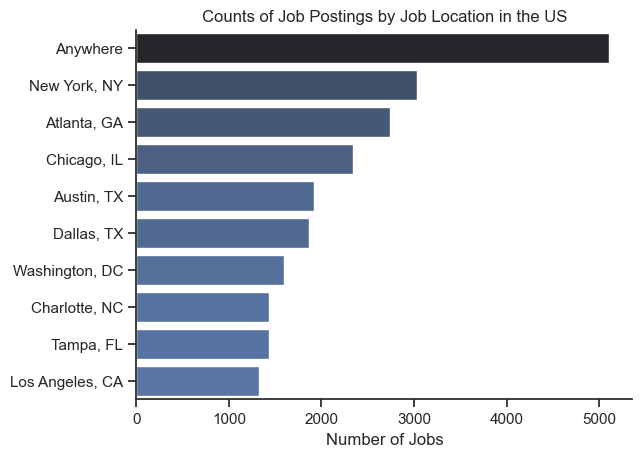

In [41]:
sns.barplot(data=df_plot_locations,  x='job_count',y=df_plot_locations.index, hue='job_count', palette="dark:b_r", legend=False)
sns.set_theme(style="ticks")
sns.despine()
plt.title("Counts of Job Postings by Job Location in the US")
plt.ylabel("")
plt.xlabel("Number of Jobs")
#plt.legend(title="Job Count")
plt.show()

In [24]:
job_requirements = {
  'job_work_from_home':'Work from Home',
  'job_no_degree_mention': 'Job Degree Required', 
  'job_health_insurance': 'Health Insurance Offered'
}

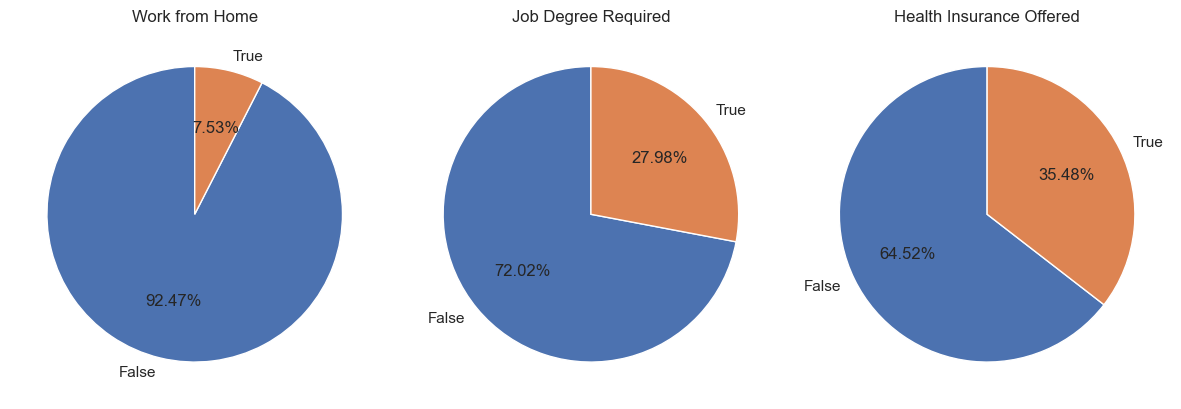

In [ ]:
(fig, ax) = plt.subplots(1,3)
fig.set_size_inches((12,5))
for (i,(column,title)) in enumerate(job_requirements.items()):
  df_plot= df_us_da[column].value_counts()
  ax[i].pie(df_plot,autopct='%1.2f%%',startangle=90, labels=['False','True'] )
  ax[i].set_ylabel("")
  ax[i].set_title(title)
  
fig.tight_layout()
plt.show() 

In [40]:
df_plot_companies = df_us_da['company_name'].value_counts().sort_values(ascending=False).head(10).to_frame(name='job_count')

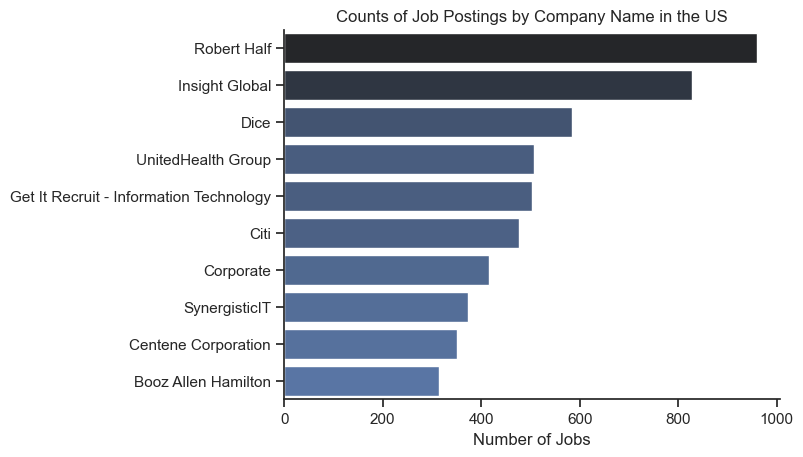

In [42]:
sns.barplot(data=df_plot_companies,  x='job_count',y=df_plot_companies.index, hue='job_count', palette="dark:b_r", legend=False)
sns.set_theme(style="ticks")
sns.despine()
plt.title("Counts of Job Postings by Company Name in the US")
plt.ylabel("")
plt.xlabel("Number of Jobs")
plt.show()